<a href="https://colab.research.google.com/github/Santiago-Quinteros/EEG_ECG_analysis/blob/main/Medical_signals_ECG_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyse des signaux médicaux - Séance 1 de TP
--

At the end of this session, you will be able to :
- Create and manage the Jupyter Notebooks environment to run code, insert text and math equations
- Perform basic matrix manipulations using Numpy
- Create signals and perform basic scientific computing using Scipy and Numpy
- Produce simple data visulisation using Matplotlib
- Open, manipulate and visualize an EEG dataset used in the course

### This session is **evaluated**. We will check the correctness of your code and your written answers of all the cells marked with **MARKED QUESTION**

In [ ]:
!pip install mne
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Part 3 - Application to an EEG + ECG dataset
--

Let's load some EEG + ECG data collected using OpenBCI and visualize it

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
### The next command is not python, but is specific to jupyter.

%matplotlib inline

from mne.io import read_raw_edf # This is the function to open the raw data

import matplotlib.pyplot as plt # We also import the plotting functions from matplotlib

The following cell opens the data and fixes the data structure - just run it.

In [ ]:
filepath = 'eeg_ecg.edf' #### Set path to file here,

Raw = read_raw_edf(filepath,stim_channel=False)

# The second argument is neeeded, otherwise the function assumes that the last channel
# is a "stimulation" channel, but in our case we only have EEG channels

scales = dict(eeg='auto') ### This is necessary because the data acquired by openBCI

Raw.load_data()

Extracting EDF parameters from /content/eeg_ecg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 15499  =      0.000 ...    61.996 secs...


<RawEDF | eeg_ecg.edf, 5 x 15500 (62.0 s), ~616 kB, data loaded>

Information about the data can be obtained by examining the "info" structure from the Raw object.

Let's print it .

In [ ]:
print(Raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: C4, P4, O2, EOG, ECG
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2020-06-19 10:49:12 UTC
 nchan: 5
 projs: []
 sfreq: 250.0 Hz
>


Most importantly, we can see the channel names and the sampling frequency.

The data can be fetched into a numpy array, using the "get_data()" method.

In [ ]:
exg_array = Raw.get_data()

**MARKED QUESTION: What is the shape of this array ? What do the respective dimensions correspond to ?
What is the duration of the recording (in seconds) ?**

In [ ]:
### To be completed (3-1): CODE + ANSWER
print('Shape of the exg array:',exg_array.shape)
print('The first term is the number of channels, the second one is the number of samples')
print('The duration is',exg_array.shape[1]/Raw.info['sfreq'])


Shape of the exg array: (5, 15500)
The first term is the number of channels, the second one is the number of samples
The duration is 62.0


ECG Analysis
--

The Raw.ch_names gives the names of all electrodes. Which index corresponds to the ECG ?

In [ ]:
### TO BE COMPLETED  (3-2)
print('The channels names are:',Raw.ch_names)
ECG_index=Raw.ch_names.index('ECG')
print('The chanel of ECG correspond to the channel: ', ECG_index, ',The channels start with 0')

The channels names are: ['C4', 'P4', 'O2', 'EOG', 'ECG']
The chanel of ECG correspond to the channel:  4 ,The channels start with 0


The Raw.= vector gives the time points of measurements, in seconds.

Thus, it can be used to plot the data.

**MARKED QUESTION
In the cell below plot the first 5 seconds of ECG. Can you identify the PQRST complex ? How long is approximately a whole cycle ? What about the T-wave ?  What is the time (approximately, in seconds) of the first R peak in the first PQRST complex?**

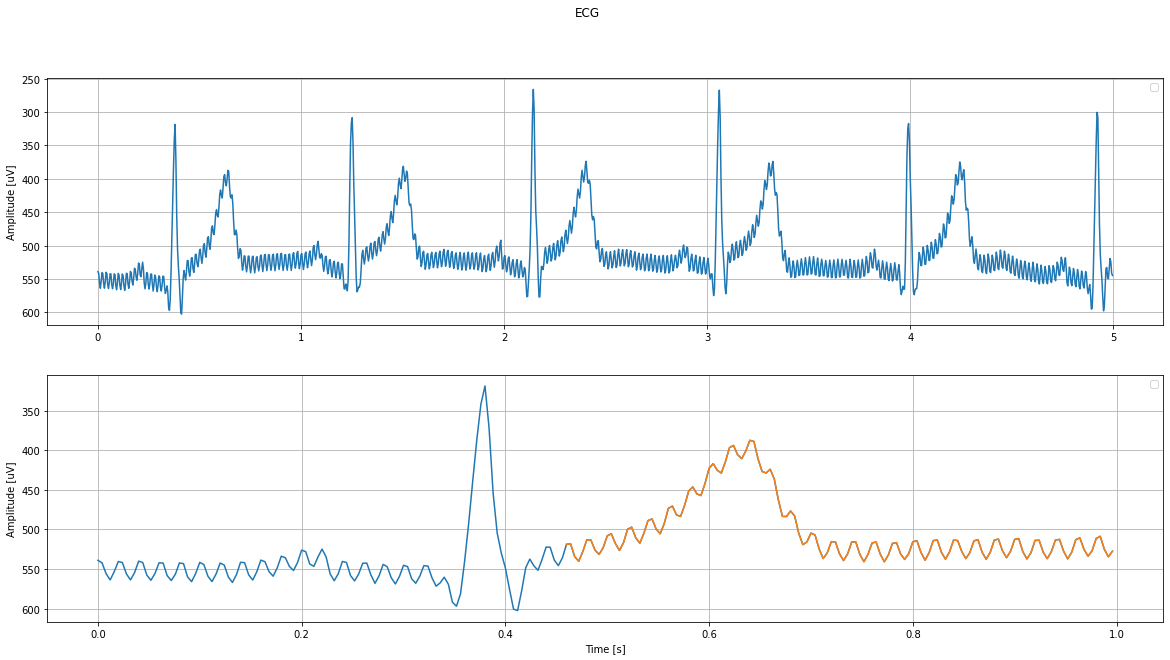

Aproximately every one second there is a PQRST complex visible
we can see the peaks PQRST respectively in the second plot
we can see T-wave in orange
The time aprox of the first R peak is 0,38s


In [ ]:
#### TO BE COMPLETED (3-3) CODE + ANSWER
#Before plot the PQRST signal, we can invert the y axis to identify the signal as seen in class


fig1, ax= plt.subplots(nrows=2, ncols=1,figsize=(20,10),sharex=False, sharey=False)
ax[0].plot(Raw.times[:1250],exg_array[4,:1250]) #First 5 seconds
ax[1].plot(Raw.times[:250],exg_array[4,:250]) #PQRST complex
ax[1].plot(Raw.times[115:250],exg_array[4,115:250]) #T-wave
for i in range(2):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylabel('Amplitude [uV]')
    ax[i].invert_yaxis()#Fonction pour invert le plot with the y_axis
plt.xlabel('Time [s]')
plt.suptitle('ECG')

plt.show()

print('Aproximately every one second there is a PQRST complex visible')
print('we can see the peaks PQRST respectively in the second plot')
print('we can see T-wave in orange')
print('The time aprox of the first R peak is 0,38s')






**MARKED QUESTION Now we would be interested in analysis Heart Rate Variability, by extracting the *exact* times corresponding to the peak of the R wave**

Try to perform this using the [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) function from scipy and find the peaks corresponding to the first 5 seconds of ECG

A few things to note :
- find_peaks works for local maxima.
- You have to set a minimal distance between two peaks


Text(0.5, 0.98, '2 Premieres PQRST')

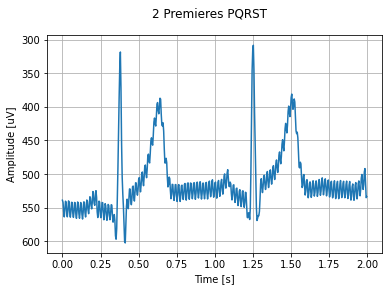

In [ ]:
from scipy.signal import find_peaks

### TO BE COMPLETED (3-4)
#For use the function of find peaks is Required minimal horizontal distance (>= 1) in samples between neighbouring peaks.
two_signalarray = Raw.times < 2

two_seconds = Raw.times[two_signalarray]
ECG_twoseconds = exg_array[ECG_index][two_signalarray]
plt.plot(two_seconds,ECG_twoseconds) #We create a vector with the two first PQRST of the channel
plt.gca().invert_yaxis()#Fonction pour invert le plot with the y_axis
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('2 Premieres PQRST')

The distance in seconds between peaks is: 0.875 s
The number of samples between them is : 218.0


Text(0.5, 0.98, '2 Premieres R peaks')

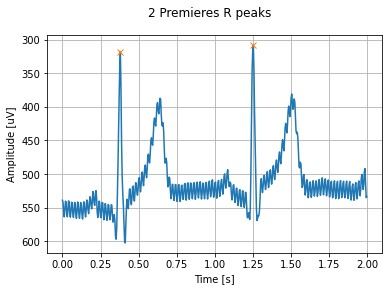

In [ ]:
#For find the peaks, we can calculate the distance between the biggest peaks, peaks R, only for the first two peaks
distance = 1.25-((0.5+0.25)/2)# Peak1=(0.5-0.25)/2, Peak2=1.25
muestras = distance * Raw.info['sfreq']
print('The distance in seconds between peaks is:',distance,'s')
print('The number of samples between them is :', np.floor(muestras))
peaks,_= find_peaks(-ECG_twoseconds, distance = np.floor(muestras))
plt.plot(two_seconds, ECG_twoseconds)
plt.plot(two_seconds[peaks], ECG_twoseconds[peaks], "x")
plt.grid()
plt.gca().invert_yaxis()


plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('2 Premieres R peaks')

Text(0.5, 0.98, '6 R peaks')

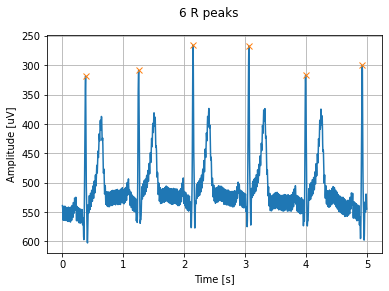

In [ ]:
#Now we can show the peaks for 5 seconds
five_signalarray = Raw.times < 5

five_seconds = Raw.times[five_signalarray]
ECG_fiveseconds = exg_array[ECG_index][five_signalarray]
fiveseconds_peaks,_= find_peaks(-ECG_fiveseconds, distance = np.floor(muestras))
plt.plot(five_seconds, ECG_fiveseconds)
plt.plot(five_seconds[fiveseconds_peaks], ECG_fiveseconds[fiveseconds_peaks], "x")
plt.gca().invert_yaxis()
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('6 R peaks')

Once you have found the times of the peak, plot them aligned with the ECG signal. You can use plt.plot, followed by plt.stem, like this (assuming you have named R_times the vector containing the times correspond to the peaks of the R waves)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


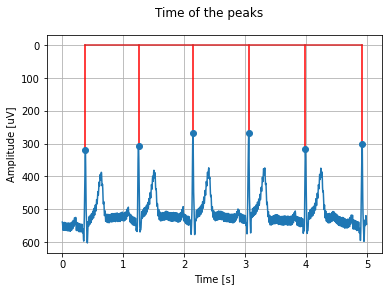

In [ ]:
# MARKED FIGURE
plt.plot(five_seconds, ECG_fiveseconds)
R_times = five_seconds[fiveseconds_peaks]
plt.stem(five_seconds[fiveseconds_peaks],ECG_fiveseconds[fiveseconds_peaks],'r')
plt.gca().invert_yaxis()
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('Time of the peaks')

plt.show()

This seems to work fine on the first five seconds. Now, can you do it on the whole recording ? A longer section of the recording ?

Text(0.5, 0.98, 'R peaks')

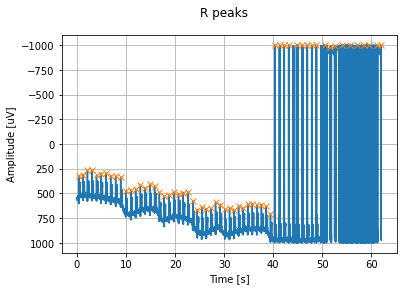

In [ ]:
### TO BE COMPLETED (3-5)
#For all the recording, we have the next two plots
signalarray = Raw.times <62

seconds = Raw.times[signalarray]
ECG_seconds = exg_array[ECG_index][signalarray]
seconds_peaks,_= find_peaks(-ECG_seconds, distance = np.floor(muestras))
plt.plot(seconds, ECG_seconds)
plt.plot(seconds[seconds_peaks], ECG_seconds[seconds_peaks], "x")
plt.gca().invert_yaxis()
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('R peaks')

Text(0.5, 0.98, 'Time of the peaks, first 40 seconds')

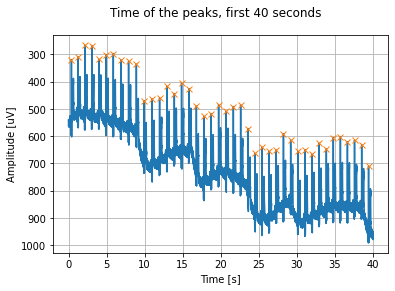

In [ ]:
#If we use only the part of the first 40 seconds, we obtain the next plot
forty_signalarray = Raw.times <40

forty_seconds = Raw.times[forty_signalarray]
ECG_fortyseconds = exg_array[ECG_index][forty_signalarray]
forty_seconds_peaks,_= find_peaks(-ECG_fortyseconds, distance = np.floor(muestras))
plt.plot(forty_seconds, ECG_fortyseconds)
plt.plot(forty_seconds[forty_seconds_peaks], ECG_fortyseconds[forty_seconds_peaks], "x")
plt.gca().invert_yaxis()
plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Amplitude [uV]')
plt.suptitle('Time of the peaks, first 40 seconds')

Next step : we are going to estimate heart rate variability with a reasonable number of successive R peaks (e.g. at least 20 s of signal)

First, compute the durations between peak R times.

In [ ]:
#### TO BE COMPLETED (3-6)

print('The peaks distance is:', np.diff(seconds_peaks))
#np.diff giveus the difference between one peak and the next closest
# There are some variations in values greater than 40 seconds
print('Peaks number:', seconds_peaks.shape[0])

The peaks distance is: [218 223 229 233 232 241 247 254 256 256 258 249 242 242 238 242 244 244
 244 243 244 240 240 245 225 232 233 234 237 237 238 237 228 233 236 229
 233 231 233 235 226 219 250 236 239 421 245 253 235 232 433 273 234 374
 418 364 353 220 416 221]
Peaks number: 61


Visualize all those durations using an histogram, provided by matplotlib plt.hist()

Text(0.5, 0.98, "Time between peaks' histogram")

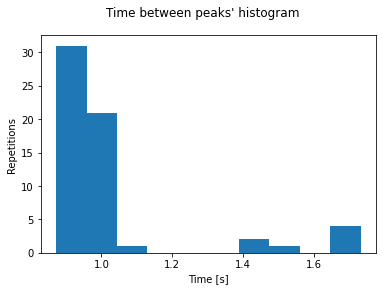

In [ ]:
# To be completed (3-7)
plt.hist(np.diff(seconds_peaks)/Raw.info['sfreq'])
plt.xlabel('Time [s]')
plt.ylabel('Repetitions')
plt.suptitle("Time between peaks' histogram")

**MARKED QUESTION: Calculate the average heart rate in Beats Per Minute**

In [ ]:
### To be computed (3-8)
average = np.mean(np.diff(seconds_peaks))
average_time =average/250 #Frequency=250Hz
print('Le temps moyen pour que un battement de coeur se produise est:', average_time)
heart_rate = 60/average_time
print('La fréquence cardiaque moyenne en battements par minute est:',heart_rate)
print('La fréquence cardiaque moyenne normal doit etre entre 60-100 beats per minute')

Le temps moyen pour que un battement de coeur se produise est: 1.0264666666666666
La fréquence cardiaque moyenne en battements par minute est: 58.45294537896993
La fréquence cardiaque moyenne normal doit etre entre 60-100 beats per minute


Part 4 - EEG Analysis
--

Now we will analyse the first four electrodes of the exg_array, corresponding to EEG electrodes.

What are the names of those electrodes ?

Look up how they are placed by checking the 10/20 EEG electrode placement.

In [ ]:
### To be completed (4-1)
print('The channels names are:',Raw.ch_names[0:4])

The channels names are: ['C4', 'P4', 'O2', 'EOG']


***Each electrode placement site has a letter to identify the lobe, or area of the brain it is reading from: pre-frontal (Fp), frontal (F), temporal (T), parietal (P), occipital (O), and central (C). Besides, EOG is Electrooculagraphie***

Use what we have learned so far to plot a few segments of EEG data.

What can we notice when looking at the signal globally ?

All the signals are noisy.


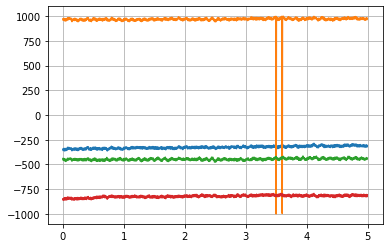

In [ ]:
#All the signals for a period of 5 seconds
sample_time=5
plt.plot(Raw.times[Raw.times<sample_time],exg_array[0,Raw.times<sample_time], label="C4")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[1,Raw.times<sample_time], label="P4")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[2,Raw.times<sample_time], label="02")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[3,Raw.times<sample_time], label="EOG")
plt.grid()

print('All the signals are noisy.')

We can see that all the signals rise over time, this could be a right mesure, but it doesnt seem like it 
 because all the signals rise in the same way, the rise after 10 seconds seems to be undesirable. 
 we will ignorethe mesures previous to 20 seconds because it seems there was a problem with p4


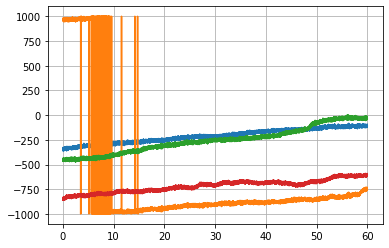

In [ ]:
#For a period of 60 seconds
sample_time=60

plt.plot(Raw.times[Raw.times<sample_time],exg_array[0,Raw.times<sample_time], label="C4")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[1,Raw.times<sample_time], label="P4")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[2,Raw.times<sample_time], label="02")
plt.plot(Raw.times[Raw.times<sample_time],exg_array[3,Raw.times<sample_time], label="EOG")
plt.grid()

print('We can see that all the signals rise over time, this could be a right mesure, but it doesnt seem like it \n because all the signals rise in the same way, the rise after 10 seconds seems to be undesirable. \n we will ignorethe mesures previous to 20 seconds because it seems there was a problem with p4' )

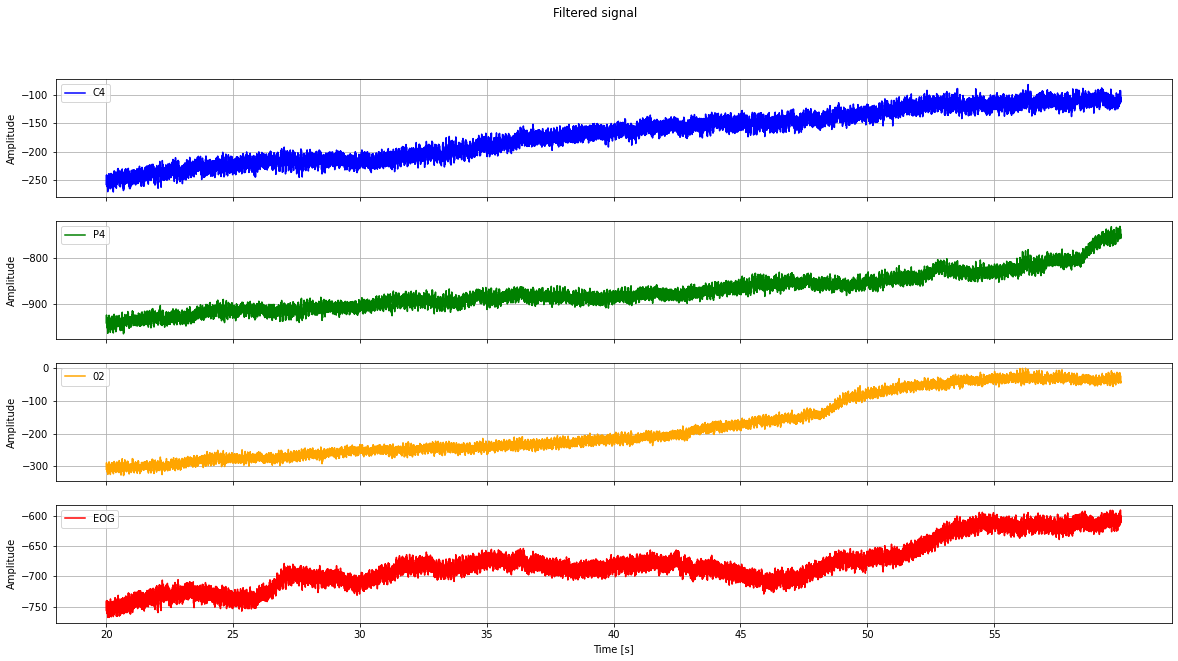

In [ ]:
#For a period of 60 seconds
sample_time=60
ignore=20
times=(Raw.times<sample_time)&(Raw.times>ignore)

fig1, ax= plt.subplots(nrows=4, ncols=1,figsize=(20,10),sharex=True, sharey=False)
ax[0].plot(Raw.times[times],exg_array[0,times], label="C4",color='blue')
ax[1].plot(Raw.times[times],exg_array[1,times], label="P4",color='green')
ax[2].plot(Raw.times[times],exg_array[2,times], label="02",color='orange')
ax[3].plot(Raw.times[times],exg_array[3,times], label="EOG",color='red')

for i in range(4):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(20, 60, 5))
plt.show()

We will preprocess this data using filtering. This can be done using the method "filter" from MNE.

More background on filtering can be found [here](https://mne.tools/stable/auto_tutorials/discussions/plot_background_filtering.html#disc-filtering)

The filter method modifies the data in place, so we work on a copy.

In [ ]:
raw_filt = Raw.copy()

In [ ]:
print(raw_filt.info)

<Info | 7 non-empty values
 bads: []
 ch_names: C4, P4, O2, EOG, ECG
 chs: 5 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2020-06-19 10:49:12 UTC
 nchan: 5
 projs: []
 sfreq: 250.0 Hz
>


We will remove two things with filtering : slow trend, and high frequency noise due to line noise (> 40 Hz).

**MARKED QUESTION: Remove slow drift and high frequency noise with the appropriate filter, and justify your cut-off frequencies choices. You can have a look at this [filtering tutorial](https://mne.tools/stable/auto_tutorials/preprocessing/30_filtering_resampling.html#repairing-artifacts-by-filtering)**

In [ ]:
pip install -U mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 8251 samples (33.004 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


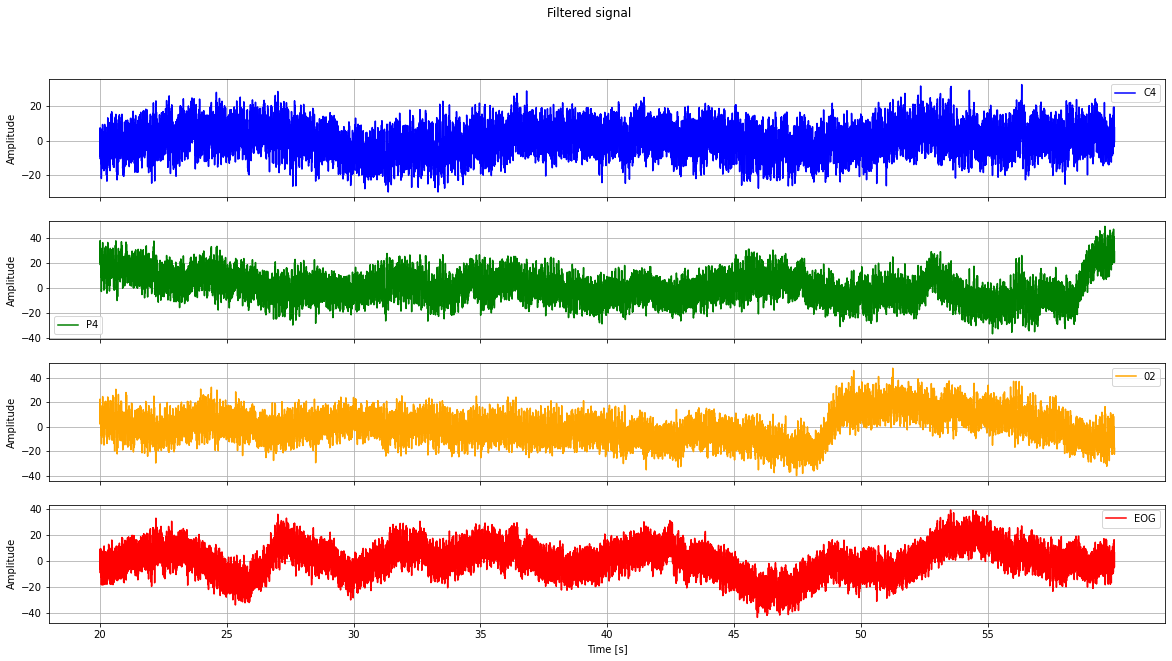

We can see that with a highpass filter, with a cut frq of 0.1 Hz, the slow trend disapears and the signal keeps its shape


In [ ]:
#TO be completed (4-3)
#TRABAJAR EN RAW FILT PORQUE SINO MODIFICAS LOS DATOS, usamos filtrer de MNE
import os
import mne

cutoff=0.1
raw_highpass = raw_filt.filter(l_freq=cutoff, h_freq=None)
exg_array_filt = raw_filt.get_data()
sample_time=60

fig1, ax= plt.subplots(nrows=4, ncols=1,figsize=(20,10),sharex=True, sharey=False)
ax[0].plot(Raw.times[times],exg_array_filt[0,times], label="C4",color='blue')
ax[1].plot(Raw.times[times],exg_array_filt[1,times], label="P4",color='green')
ax[2].plot(Raw.times[times],exg_array_filt[2,times], label="02",color='orange')
ax[3].plot(Raw.times[times],exg_array_filt[3,times], label="EOG",color='red')

for i in range(4):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(20, 60, 5))
plt.show()

print('We can see that with a highpass filter, with a cut frq of 0.1 Hz, the slow trend disapears and the signal keeps its shape')

Plot the result

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished


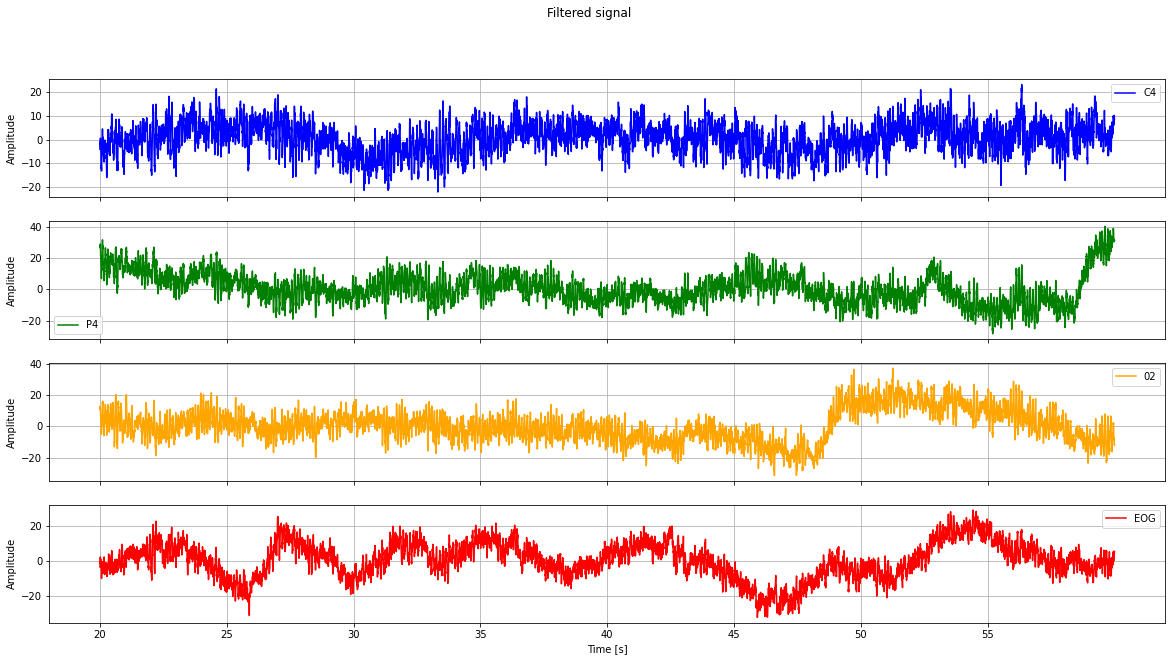

We want to eliminate the line freq and its armonics (50Hz in france, no more than Nyquist frec, 125Hz)
The signal is clearly less noisy


In [ ]:
# To be completed (4-4)
picks=[0,1,2,3]
freqs = (50, 100) #
raw_notch_fit = raw_filt.notch_filter(freqs, picks)
exg_array_filt2 = raw_filt.get_data()

fig1, ax= plt.subplots(nrows=4, ncols=1,figsize=(20,10),sharex=True, sharey=False)
ax[0].plot(Raw.times[times],exg_array_filt2[0,times], label="C4",color='blue')
ax[1].plot(Raw.times[times],exg_array_filt2[1,times], label="P4",color='green')
ax[2].plot(Raw.times[times],exg_array_filt2[2,times], label="02",color='orange')
ax[3].plot(Raw.times[times],exg_array_filt2[3,times], label="EOG",color='red')

for i in range(4):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.suptitle('Filtered signal')
plt.xticks(np.arange(20, 60, 5))
plt.show()

print('We want to eliminate the line freq and its armonics (50Hz in france, no more than Nyquist frec, 125Hz)')
print('The signal is clearly less noisy')


Estimating the Power Spectral Density of Raw Data
--

We are using [MNE](https://mne.tools/stable/auto_tutorials/index.html) to load and process the EEG data.

The data is managed using an object, Raw, which includes methods for visualization, filtering, and much more.

We can directly plot the Power Spectral density (PSD) using the plot_psd method of the Raw object. A few things :
- Use the "picks" argument to select only the first four electrodes, as the fifth one is the ECG.
- Compare the filtered and raw version


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
We can see a great peak at 50Hz, which is the high frequency noise due to line noise


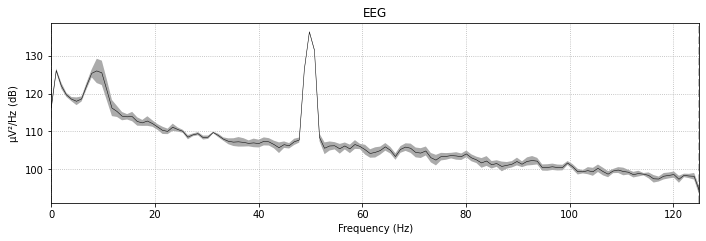

In [ ]:
### TO BE COMPLETED  (4-5)
#plot_psd([fmin, fmax, tmin, tmax, picks, ...])


fig = Raw.plot_psd(fmax=125,tmin=20,tmax=60, picks=np.arange(0,4,1), average=True)
#fig = Raw.plot_psd(average = True, picks=np.arange(0,3,1))

print('We can see a great peak at 50Hz, which is the high frequency noise due to line noise')


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.024 (s)
In this graph the 50 HZ peak is eliminated


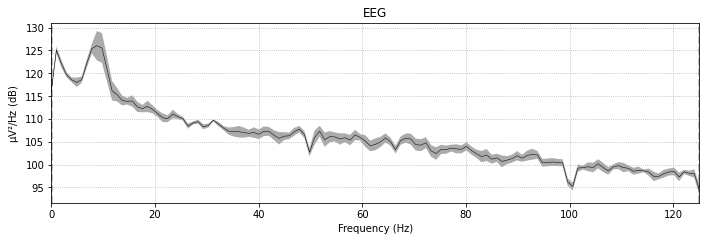

In [ ]:
fig = raw_filt.plot_psd(fmax=125,tmin=20,tmax=60, picks=np.arange(0,4,1), average=True)
print('In this graph the 50 HZ peak is eliminated')

Finding EOG artifacts
--

MNE comes with very nice methods to automatically find artefacts. This is explained in depth [here](https://mne.tools/stable/auto_tutorials/preprocessing/plot_10_preprocessing_overview.html#sphx-glr-auto-tutorials-preprocessing-plot-10-preprocessing-overview-py).


**MARKED QUESTION: Quickly go through this tutorial, apply the create_eog_epochs to find all EOG artefacts in the provided data (eeg channels), show and comment your results**

In [ ]:
from mne.preprocessing import create_eog_epochs

In [ ]:
create_eog_epochs?

Using EOG channel: EOG
EOG channel index for this subject is: [3]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2500 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 228 significant peaks
Number of EOG events detected: 228
Not setting metadata
228 matching events found
No baseline correction applied
Using data from preloaded Raw for 228 events and 10001 original time points ...
220 bad epochs dropped
Not setting metadata
8 matching events found
No baseline correctio

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


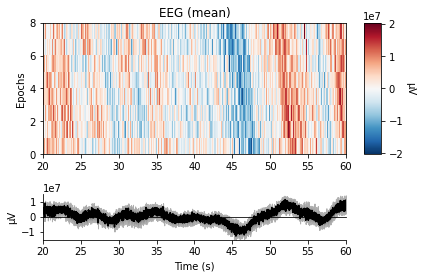

[<Figure size 432x288 with 3 Axes>]

In [ ]:
# TO BE COMPLETED (4-6)
eog_epochs = create_eog_epochs(raw_filt, ch_name='EOG', picks=[0,1,2,3], tmin=20, tmax=60)
eog_epochs.plot_image(combine='mean')
